In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# !unzip /content/drive/MyDrive/Avastha_Research/deepface-master.zip

In [3]:
# !pip install deepface
# !pip install keras==2.4.3
# !pip install tensorflow==2.4.1


# IMPORTING LIBRARIES

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Conv2D
from tensorflow.keras.models import Model
from keras.preprocessing import image
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array

import tensorflow.compat.v2 as tf
import numpy as np
from tensorflow import keras

2022-11-27 01:50:08.555443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 01:50:08.767289: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-27 01:50:09.492665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-27 01:50:09.492725: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

# MODEL

In [5]:
model = Sequential()

model.add(tf.keras.layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
# model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.ZeroPadding2D((1,1)))
model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(tf.keras.layers.Convolution2D(4096, (7, 7), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Convolution2D(4096, (1, 1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(tf.keras.layers.Activation('softmax'))

2022-11-27 01:50:10.372361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 01:50:10.456645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 01:50:10.456784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 01:50:10.457250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [6]:
# !unzip /content/drive/MyDrive/Avastha_Research/vggfaceweights.zip

#### LOADING VGG_FACE_WEIGHTS

In [7]:
from keras.models import model_from_json
model.load_weights('/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/vgg_face_weights.h5')

In [8]:
vgg_face_descriptor = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

### PREPROCESSING

In [9]:
def preprocess_image(image_path):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = tf.keras.applications.resnet50.preprocess_input(img)
  return img

In [10]:
# img1_representation = vgg_face_descriptor.predict(preprocess_image('/content/drive/MyDrive/Avastha_Research/Renamed_images/1.jpg'))[0,:]
# img2_representation = vgg_face_descriptor.predict(preprocess_image('/content/drive/MyDrive/Avastha_Research/Renamed_images/2.jpg'))[0,:]


#### FindCosineDistance & findEuclideanDistance





In [11]:
def findCosineDistance(source_representation, test_representation):
  a = np.matmul(np.transpose(source_representation), test_representation)
  b = np.sum(np.multiply(source_representation, source_representation))
  c = np.sum(np.multiply(test_representation, test_representation))
  return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
  euclidean_distance = source_representation - test_representation
  euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
  euclidean_distance = np.sqrt(euclidean_distance)
  return euclidean_distance

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
epsilon = 0.05 #cosine similarity
#epsilon = 120 #euclidean distance
 
def verifyFace(img1, img2):
  #img1_representation = vgg_face_descriptor.predict(preprocess_image("/content/004_130.jpg"))[0,:]
  #img2_representation = vgg_face_descriptor.predict(preprocess_image("/content/004_130.jpg"))[0,:]
  

  #cosine_similarity = findCosineDistance(img1_representation, img2_representation)
  #euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
  
  cosine_similarity = findCosineDistance(img1, img2)
  euclidean_distance = findEuclideanDistance(img1, img2)
  
  print(cosine_similarity)
  print(euclidean_distance)
  
  if(cosine_similarity < epsilon):
    print("verified... they are same person")
    verification = True
  else:
    print("unverified! they are not same person!")
    verification = False

  return verification, cosine_similarity, euclidean_distance

In [14]:
# img_1_name = '/content/drive/MyDrive/Avastha_Research/Renamed_images/15.jpg'
# img_2_name = '/content/drive/MyDrive/Avastha_Research/Renamed_images/20.jpg'

# img1_representation = vgg_face_descriptor.predict(preprocess_image(img_1_name))[0,:]
# img2_representation = vgg_face_descriptor.predict(preprocess_image(img_2_name))[0,:]

# verifyFace(img1_representation, img2_representation)


# img1_representation
# img2_representation

RENAMING NAME IMAGES

In [15]:
# import os
# os.getcwd()
# collection = "/content/drive/MyDrive/Avastha_Research/SIDE_IMAGES"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("/content/drive/MyDrive/Avastha_Research/SIDE_IMAGES/" + filename, "/content/drive/MyDrive/Avastha_Research/Renamed_images/" + str(i) + ".jpg")

In [16]:
import pandas as pd
import os
import sys
from PIL import Image
sys.modules['Image'] = Image
# !conda install pillow

# *MORPHED_IMAGE VS MORPHED_IMAGE*

In [17]:
from PIL import Image
directory1 = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/THE_FINAL/'
counder = 0
Fdata = []
for i  in os.listdir(directory1):
  for j in os.listdir(directory1):
    image_1_filename=i
    image_2_filename=j


    img_1_name = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/THE_FINAL/' + image_1_filename
    img_2_name = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/THE_FINAL/' + image_2_filename

    print("COMPARING {} and {} ".format(i, j))


    img1_representation = vgg_face_descriptor.predict(preprocess_image(img_1_name))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img_2_name))[0,:]
    
    ver, cos, eucd = verifyFace(img1_representation, img2_representation)

    counder+=1
    Fdata.append([counder,image_1_filename,image_2_filename,ver,cos,eucd])


COMPARING image14.jpg and image14.jpg 


2022-11-27 01:50:13.883595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2022-11-27 01:50:14.670547: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 12ms/step
0.0
0.0
verified... they are same person
COMPARING image14.jpg and image11.jpg 
1/1 [==============================] - 0s 11ms/step
0.16537624597549438
50.70904
unverified! they are not same person!
COMPARING image14.jpg and image32.jpg 
1/1 [==============================] - 0s 11ms/step
0.14442789554595947
48.197628
unverified! they are not same person!
COMPARING image14.jpg and image22.jpg 
1/1 [==============================] - 0s 13ms/step
0.126043438911438
45.042534
unverified! they are not same person!
COMPARING image14.jpg and image12.jpg 
1/1 [==============================] - 0s 10ms/step
0.061498165130615234
31.575506
unverified! they are not same person!
COMPARING image14.jpg and image39.jpg 
1/1 [==============================] - 0s 11ms/step
0.2239065170288086
62.637737
unverified! they are not same person!
COMPARING image14.jpg and image8.jpg 
1/1 [==============================] - 0s 11ms/step
0.17980581521987915
57.37

In [20]:

df2=pd.DataFrame( Fdata,columns=["sl_no","Image_1_Name","Image_2_Name","Verified_Or_Not","Cosine_Distance","Euclidean_Distance"])
df2

,sl_no,Image_1_Name,Image_2_Name,Verified_Or_Not,Cosine_Distance,Euclidean_Distance
0,1,image14.jpg,image14.jpg,True,0.000000e+00,0.000000
1,2,image14.jpg,image11.jpg,False,1.653762e-01,50.709042
2,3,image14.jpg,image32.jpg,False,1.444279e-01,48.197628
3,4,image14.jpg,image22.jpg,False,1.260434e-01,45.042534
4,5,image14.jpg,image12.jpg,False,6.149817e-02,31.575506
...,...,...,...,...,...,...
4895,4896,image23.jpg,image16.jpg,False,9.877342e-02,39.844532
4896,4897,image23.jpg,image49.jpg,False,7.942861e-02,38.004150
4897,4898,image23.jpg,image6.jpg,False,9.870046e-02,39.183163
4898,4899,image23.jpg,image34.jpg,False,8.710754e-02,38.008205


In [29]:
# !pip install seaborn

In [24]:
import seaborn as sns

In [25]:
df2.nunique()

sl_no                 4900
Image_1_Name            70
Image_2_Name            70
Verified_Or_Not          2
Cosine_Distance       2420
Euclidean_Distance    2416
dtype: int64

In [26]:
df2.dtypes

sl_no                   int64
Image_1_Name           object
Image_2_Name           object
Verified_Or_Not          bool
Cosine_Distance       float64
Euclidean_Distance    float32
dtype: object

In [30]:
df2.shape

(4900, 6)

### VISUALIZATION OF MORPHED AND MORPHED IMAGES



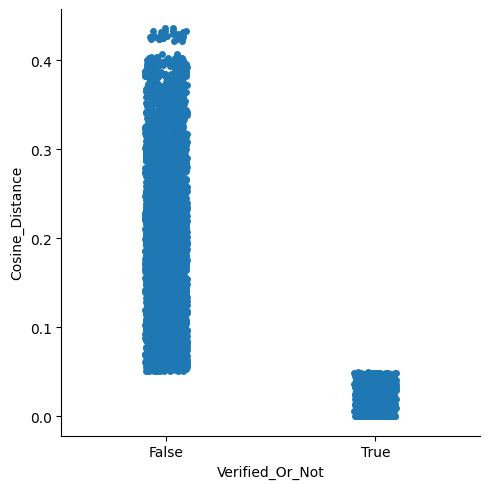

In [31]:
#As the images represented by true values are the replicas, the cosine distance comes as 0
sns.catplot(data=df2, x="Verified_Or_Not", y="Cosine_Distance")

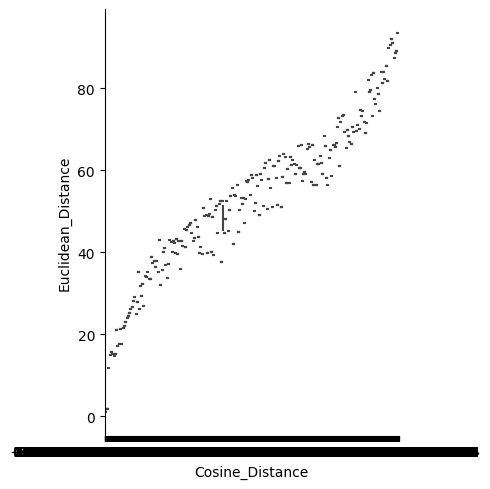

In [32]:
sns.catplot(data=df2, x="Cosine_Distance",y="Euclidean_Distance",kind="box")

In [64]:

# sns.factorplot(x='Cosine_Distance', y='Euclidean_Distance', data=df2)

In [34]:
df2.head()

,sl_no,Image_1_Name,Image_2_Name,Verified_Or_Not,Cosine_Distance,Euclidean_Distance
0,1,image14.jpg,image14.jpg,True,0.000000,0.000000
1,2,image14.jpg,image11.jpg,False,0.165376,50.709042
2,3,image14.jpg,image32.jpg,False,0.144428,48.197628
3,4,image14.jpg,image22.jpg,False,0.126043,45.042534
4,5,image14.jpg,image12.jpg,False,0.061498,31.575506


In [35]:
df2["comb_img"] = df2["Image_1_Name"]+" | "+df2["Image_2_Name"]

In [36]:
df2["comb_img"].unique()

array(['image14.jpg | image14.jpg', 'image14.jpg | image11.jpg',
       'image14.jpg | image32.jpg', ..., 'image23.jpg | image6.jpg',
       'image23.jpg | image34.jpg', 'image23.jpg | image23.jpg'],
      dtype=object)

In [37]:
image_comb_df = df2.groupby('comb_img').mean()

/tmp/ipykernel_4816/1972002352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  image_comb_df = df2.groupby('comb_img').mean()


In [38]:
import matplotlib.pyplot as plt

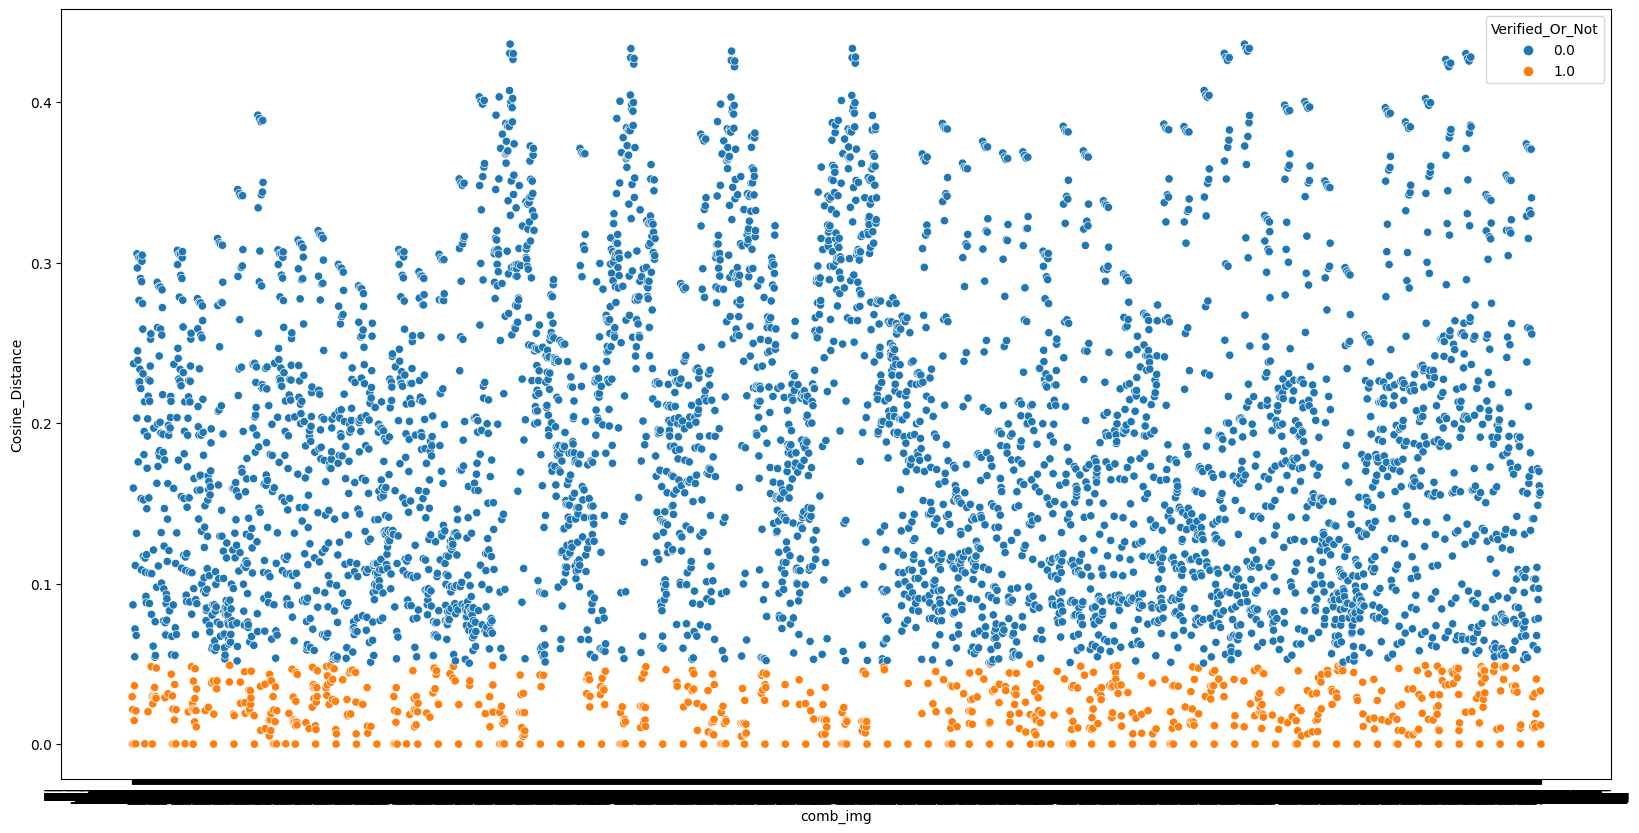

In [39]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=image_comb_df, x="comb_img", y="Cosine_Distance", hue="Verified_Or_Not")

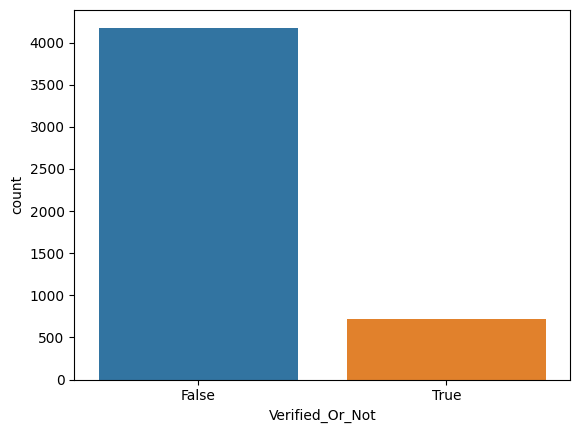

In [40]:
ax = sns.countplot(x="Verified_Or_Not", data=df2)

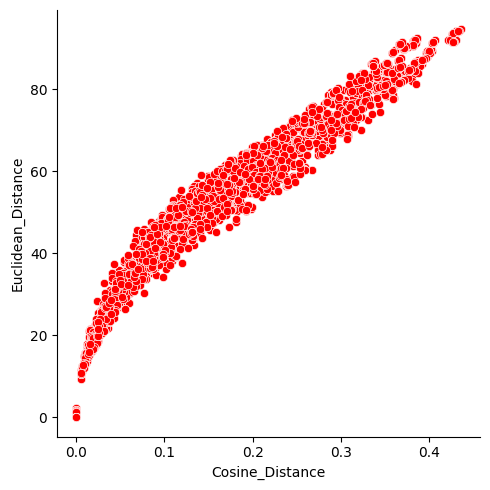

In [41]:
ax = sns.relplot(x="Cosine_Distance",y="Euclidean_Distance", data=df2,color="red")

# *REAL IMAGES VS MORPHED IMAGES* 

In [43]:
directory1 = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/Renamed_images/'
directory2 = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/THE_FINAL/'

counder = 0
Fdata = []
for i  in os.listdir(directory1):
  for j in os.listdir(directory2):
    image_1_filename=i
    image_2_filename=j


    img_1_name = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/Renamed_images/' + image_1_filename
    img_2_name = '/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/THE_FINAL/' + image_2_filename

    print("COMPARING {} and {} ".format(i, j))


    img1_representation = vgg_face_descriptor.predict(preprocess_image(img_1_name))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img_2_name))[0,:]
    
    ver, cos, eucd = verifyFace(img1_representation, img2_representation)

    counder+=1
    Fdata.append([counder,image_1_filename,image_2_filename,ver,cos,eucd])


COMPARING 3.jpg and image14.jpg 
1/1 [==============================] - 0s 12ms/step
0.01444011926651001
16.593689
verified... they are same person
COMPARING 3.jpg and image11.jpg 
1/1 [==============================] - 0s 11ms/step
0.15447312593460083
51.248455
unverified! they are not same person!
COMPARING 3.jpg and image32.jpg 
1/1 [==============================] - 0s 12ms/step
0.1605096459388733
52.628796
unverified! they are not same person!
COMPARING 3.jpg and image22.jpg 
1/1 [==============================] - 0s 13ms/step
0.1206439733505249
45.79991
unverified! they are not same person!
COMPARING 3.jpg and image12.jpg 
1/1 [==============================] - 0s 11ms/step
0.06364768743515015
33.689415
unverified! they are not same person!
COMPARING 3.jpg and image39.jpg 
1/1 [==============================] - 0s 11ms/step
0.21836113929748535
63.29879
unverified! they are not same person!
COMPARING 3.jpg and image8.jpg 
1/1 [==============================] - 0s 10ms/step
0.18986

In [44]:
import pandas as pd

In [45]:
import os

In [46]:
df3=pd.DataFrame( Fdata,columns=["sl_no","Image_1_Name","Image_2_Name","Verified_Or_Not","Cosine_Distance","Euclidean_Distance"])

In [63]:
df2.to_csv('/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/dataframe/df2.csv')

In [61]:
df3

,sl_no,Image_1_Name,Image_2_Name,Verified_Or_Not,Cosine_Distance,Euclidean_Distance,comb_img
0,1,3.jpg,image14.jpg,True,0.014440,16.593689,3.jpg | image14.jpg
1,2,3.jpg,image11.jpg,False,0.154473,51.248455,3.jpg | image11.jpg
2,3,3.jpg,image32.jpg,False,0.160510,52.628796,3.jpg | image32.jpg
3,4,3.jpg,image22.jpg,False,0.120644,45.799911,3.jpg | image22.jpg
4,5,3.jpg,image12.jpg,False,0.063648,33.689415,3.jpg | image12.jpg
...,...,...,...,...,...,...,...
415,416,5.jpg,image16.jpg,False,0.174712,55.064762,5.jpg | image16.jpg
416,417,5.jpg,image49.jpg,False,0.105107,44.306343,5.jpg | image49.jpg
417,418,5.jpg,image6.jpg,False,0.178033,54.921009,5.jpg | image6.jpg
418,419,5.jpg,image34.jpg,False,0.107633,43.726379,5.jpg | image34.jpg


In [62]:
df3.to_csv('/home/hpc-lavasa/Desktop/Avastha_Research-20221126T174731Z-001/Avastha_Research/dataframe/df3.csv')

In [48]:
df3.shape

(420, 6)

### VISUALIZATION OF MORPHED VS REAL IMAGES

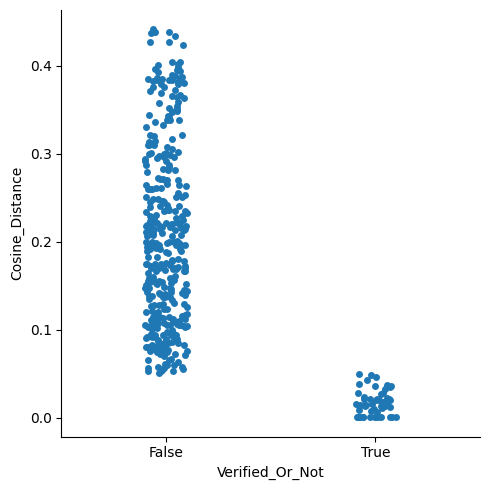

In [49]:
#As the images represented by true values are the replicas, the cosine distance comes as 0
sns.catplot(data=df3, x="Verified_Or_Not", y="Cosine_Distance")

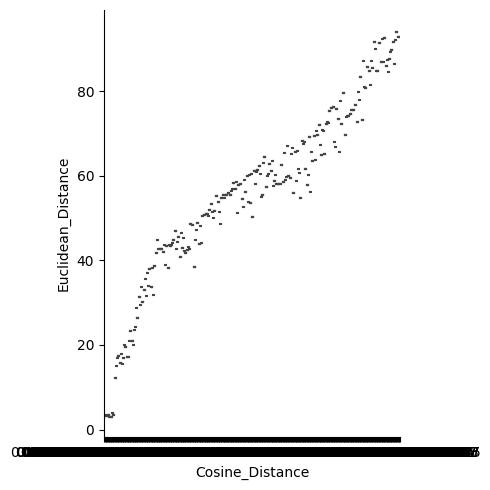

In [50]:
sns.catplot(data=df3, x="Cosine_Distance",y="Euclidean_Distance",kind="box")

In [60]:
# sns.factorplot(x='Cosine_Distance', y='Euclidean_Distance', data=df3)

In [52]:
df2.head()

,sl_no,Image_1_Name,Image_2_Name,Verified_Or_Not,Cosine_Distance,Euclidean_Distance,comb_img
0,1,image14.jpg,image14.jpg,True,0.000000,0.000000,image14.jpg | image14.jpg
1,2,image14.jpg,image11.jpg,False,0.165376,50.709042,image14.jpg | image11.jpg
2,3,image14.jpg,image32.jpg,False,0.144428,48.197628,image14.jpg | image32.jpg
3,4,image14.jpg,image22.jpg,False,0.126043,45.042534,image14.jpg | image22.jpg
4,5,image14.jpg,image12.jpg,False,0.061498,31.575506,image14.jpg | image12.jpg


In [53]:
df3["comb_img"] = df3["Image_1_Name"]+" | "+df3["Image_2_Name"]

In [54]:
df3["comb_img"].unique()

array(['3.jpg | image14.jpg', '3.jpg | image11.jpg',
       '3.jpg | image32.jpg', '3.jpg | image22.jpg',
       '3.jpg | image12.jpg', '3.jpg | image39.jpg', '3.jpg | image8.jpg',
       '3.jpg | image21.jpg', '3.jpg | image17.jpg',
       '3.jpg | image44.jpg', '3.jpg | image61.jpg',
       '3.jpg | image26.jpg', '3.jpg | image45.jpg', '3.jpg | image3.jpg',
       '3.jpg | image36.jpg', '3.jpg | image68.jpg',
       '3.jpg | image27.jpg', '3.jpg | image10.jpg',
       '3.jpg | image42.jpg', '3.jpg | image52.jpg',
       '3.jpg | image50.jpg', '3.jpg | image5.jpg', '3.jpg | image58.jpg',
       '3.jpg | image33.jpg', '3.jpg | image60.jpg',
       '3.jpg | image28.jpg', '3.jpg | image19.jpg',
       '3.jpg | image55.jpg', '3.jpg | image56.jpg',
       '3.jpg | image24.jpg', '3.jpg | image37.jpg',
       '3.jpg | image18.jpg', '3.jpg | image31.jpg',
       '3.jpg | image59.jpg', '3.jpg | image46.jpg', '3.jpg | image2.jpg',
       '3.jpg | image54.jpg', '3.jpg | image1.jpg', '3.jpg | ima

In [55]:
image_comb_df = df3.groupby('comb_img').mean()

/tmp/ipykernel_4816/72302953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  image_comb_df = df3.groupby('comb_img').mean()


In [56]:
import matplotlib.pyplot as plt

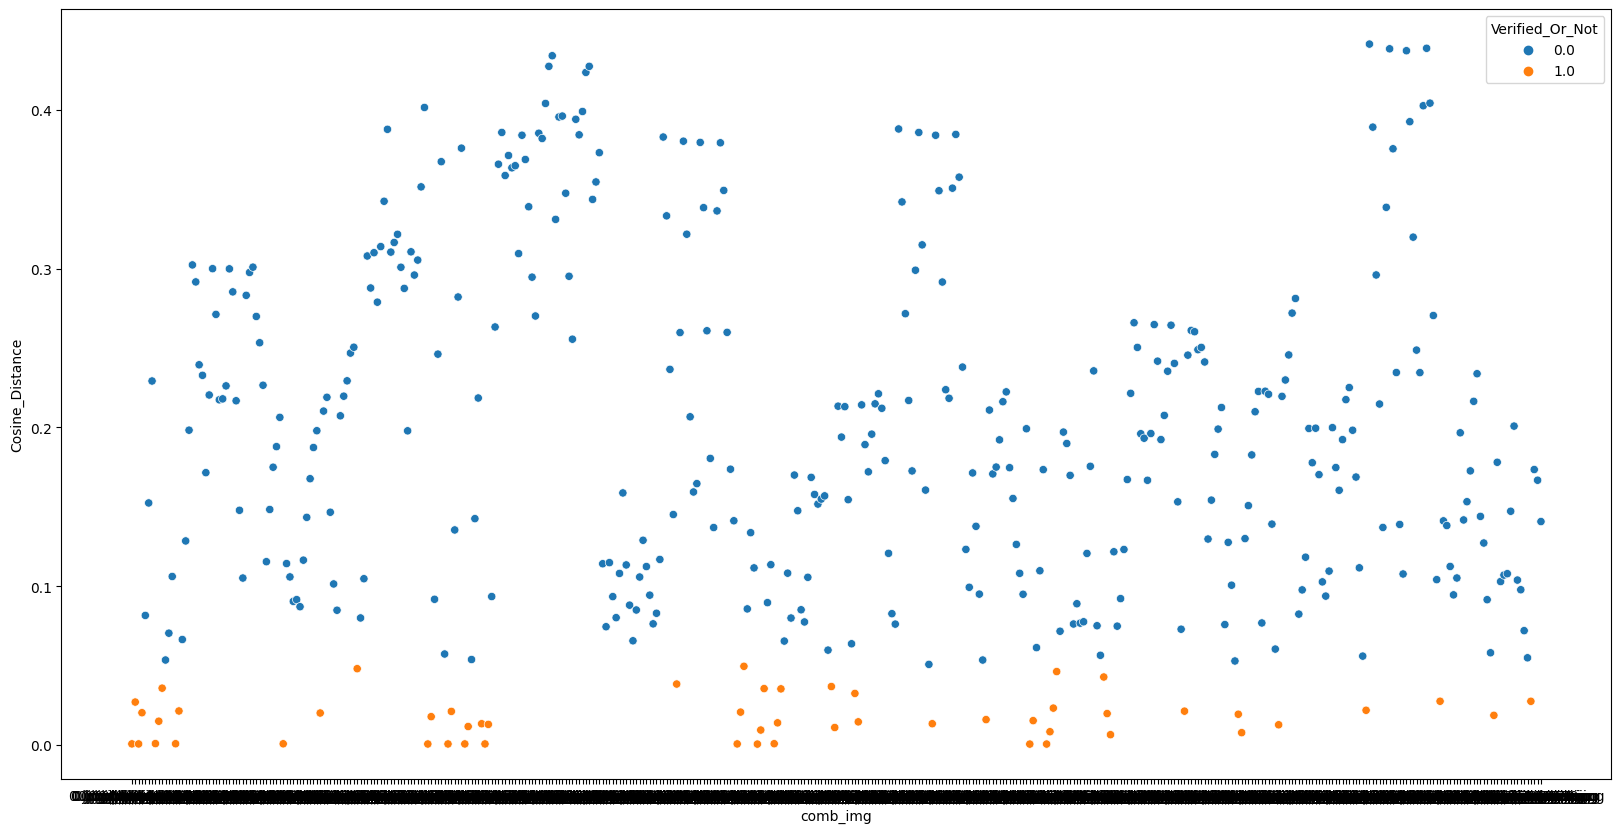

In [57]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=image_comb_df, x="comb_img", y="Cosine_Distance", hue="Verified_Or_Not")

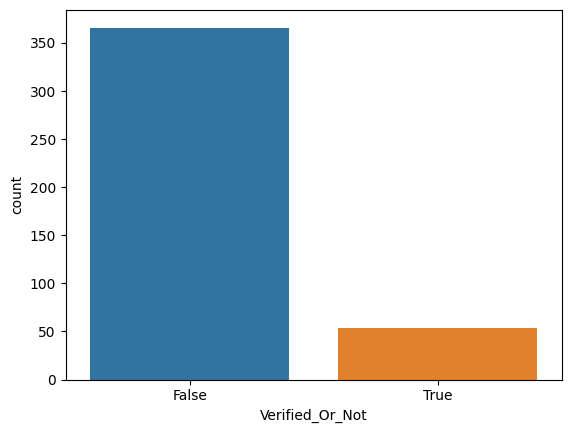

In [58]:
ax = sns.countplot(x="Verified_Or_Not", data=df3)

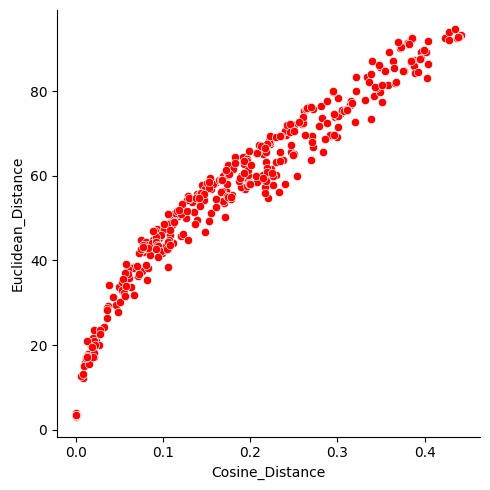

In [59]:
ax = sns.relplot(x="Cosine_Distance",y="Euclidean_Distance", data=df3,color="red")